# Kernalized Support Vector Machines
##### Multi-class classification with linear models


Kernelized support vector machines (SVMs) can provide more complex models that can go beyond linear decision boundaries. As with other supervised machine learning methods, SVMs can be used for both classification and regression.

one way to think about what kernelized SVMs do, is they take the original input data space and transform it to a new higher dimensional feature space, where it becomes much easier to classify the transform to data using a linear classifier. For example as shown in the figure
<img src="https://github.com/sumitkant/Coursera_UoM_Applied_Machine_Learning_in_Python/blob/master/Week%202/Images/1d.PNG?raw=true" width = "400px"/>

#### For a more complex problem
Here, A simple linear decision boundary just doesn't have enough expressive power to classify all these points correctly. One very powerful idea is to transform the input data from a 1-dimensional space to a 2-dimensional space. We can do this, for example, by mapping each 1-dimensional input data instance $x_i$ to a corresponding 2-dimensional ordered pair ($x_i, x_i^2$), whose new second feature is the squared value of the first feature, which is similar to addding polynomial features to a linear regression problem. We can now learn a linear support vector machine in this new, 2-deminsional feature space, whose maximum margin decision boundary will be a straight line. 

If we took the inverse of the transformation we just applied to bring the data points back to our original input space, we can see that the linear decision boundary in the 2-deminsional space corresponds to the two points where a parabola crosses the $x-axis$.
<img src="https://github.com/sumitkant/Coursera_UoM_Applied_Machine_Learning_in_Python/blob/master/Week%202/Images/svm.JPEG?raw=true" width = "400px"/>

## Two-dimensional Problem
Here we have two classes represented by the black and the white points. Each of which has two features, $x_0$ and $x_1$. 
<img src="https://github.com/sumitkant/Coursera_UoM_Applied_Machine_Learning_in_Python/blob/master/Week%202/Images/2d_KSVM.PNG?raw=true" width = "500px"/>

Transforming makes the white points, since they're close to $(0,0)$, get mapped to points with higher vertical $z$ values, that new third feature that are close to $1$. While the black points which are farther from $(0,0)$ get mapped to points with $z$ values that either close to $0$ or even negative. 
<img src="https://github.com/sumitkant/Coursera_UoM_Applied_Machine_Learning_in_Python/blob/master/Week%202/Images/2d_KSVM_2.PNG?raw=true" width = "500px"/>

With this transformation, it makes it possible to find a hyperplane. Say, $z = 0.9$, that now easily separates the white data points that are near $z = 1$ from most or all of the black data points. Finally, the decision boundary consists of the set of points in 3-D space where the paraboloid intersects the maximum margin hyperplane decision boundary. This corresponds to an ellipse-like decision boundary in 2-D space that separates the white points from the black points in the original input space. 

##  Radial Basis Function (RBF)

The kernel function in an SVM tells us, _given two points in the original input space, what is their similarity in the new feature space_.

For the radial basis function kernel, the similarity between two points and the transformed feature space is an exponentially decaying function of the distance between the vectors and the original input space as shown by the formula here.

\begin{equation}
K(x,x') = exp  [- \gamma . ||x-x'||^2]
\end{equation}

<img src="https://github.com/sumitkant/Coursera_UoM_Applied_Machine_Learning_in_Python/blob/master/Week%202/Images/rbf.PNG?raw=true" width = "500px"/>

Using the radial basis function kernel in effect, transforms all the points inside a certain distance of the circle class to one area of the transformed feature space. And all the points in the square class outside a certain radius get moved to a different area of the feature space. The dark circles and squares represents the points that might lie along the maximum margin for a support vector machine in the transformed feature space. 

the kernelized support vector machine tries to find the decision boundary with maximum margin between classes using a linear classifier in the transformed feature space not the original input space. The linear decision boundary learn feature space by linear SVM corresponds to a non-linear decision boundary In the original input space. However the algorithm doesn't have to perform this actual transformation on the data points to the new high dimensional feature space. 

Instead, the kernelized SVM can compute these more complex decision boundaries just in terms of similarity calculations between pairs of points in the high dimensional space where the transformed feature representation is implicit. This **similarity function** which mathematically is a kind of dot product **is the kernel** in kernelized SVM. 

### 1. Import Libraries

In [3]:
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

### 2. Datasets

<IPython.core.display.Javascript object>


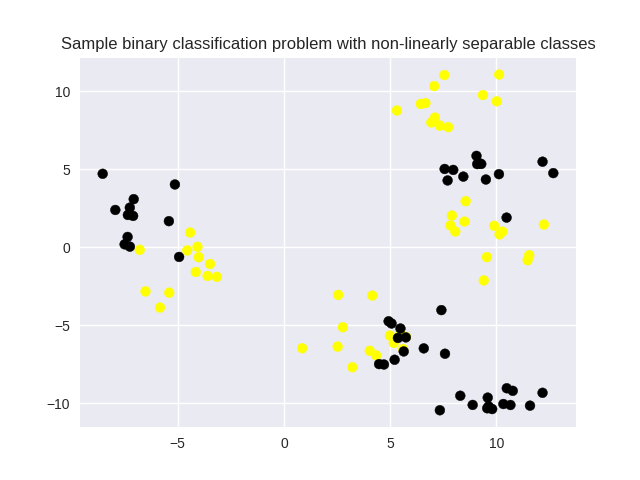

In [4]:
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer
cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

# more difficult synthetic dataset for classification (binary) 
# with classes that are not linearly separable
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2
plt.figure()
plt.title('Sample binary classification problem with non-linearly separable classes')
plt.scatter(X_D2[:,0], X_D2[:,1], c=y_D2,
           marker= 'o', s=50, cmap=cmap_bold)
plt.show()



In [7]:
# Fruits Dataset
np.set_printoptions(precision=2)
fruits = pd.read_table('fruit_data_with_colors.txt')

feature_names_fruits = ['height', 'width', 'mass', 'color_score']
X_fruits = fruits[feature_names_fruits]
y_fruits = fruits['fruit_label']
target_names_fruits = ['apple', 'mandarin', 'orange', 'lemon']

X_fruits_2d = fruits[['height', 'width']]
y_fruits_2d = fruits['fruit_label']
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


### 3. SVMs

#### LinearSVC with M classes generates M one vs rest classifiers.

In [8]:
from sklearn.svm import LinearSVC
X_train, X_test, y_train, y_test = train_test_split(X_fruits_2d, y_fruits_2d, random_state = 0)

clf = LinearSVC(C=5, random_state = 67).fit(X_train, y_train)
print('Coefficients:\n', clf.coef_)
print('Intercepts:\n', clf.intercept_)

Coefficients:
 [[-0.26  0.71]
 [-1.63  1.16]
 [ 0.03  0.29]
 [ 1.24 -1.64]]
Intercepts:
 [-3.29  1.2  -2.72  1.16]


#### Multi-class results on the fruit dataset

<IPython.core.display.Javascript object>


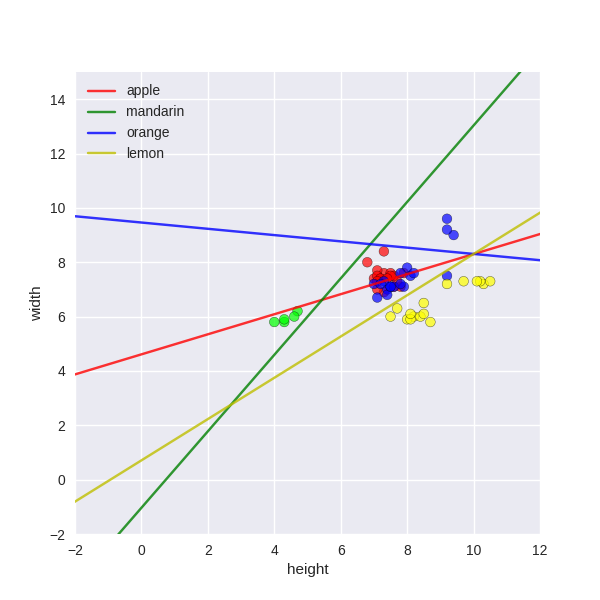

In [9]:
plt.figure(figsize=(6,6))
colors = ['r', 'g', 'b', 'y']
cmap_fruits = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#FFFF00'])

plt.scatter(X_fruits_2d[['height']], X_fruits_2d[['width']],
           c=y_fruits_2d, cmap=cmap_fruits, edgecolor = 'black', alpha=.7)

x_0_range = np.linspace(-10, 15)

for w, b, color in zip(clf.coef_, clf.intercept_, ['r', 'g', 'b', 'y']):
    # Since class prediction with a linear model uses the formula y = w_0 x_0 + w_1 x_1 + b, 
    # and the decision boundary is defined as being all points with y = 0, to plot x_1 as a 
    # function of x_0 we just solve w_0 x_0 + w_1 x_1 + b = 0 for x_1:
    plt.plot(x_0_range, -(x_0_range * w[0] + b) / w[1], c=color, alpha=.8)
    
plt.legend(target_names_fruits)
plt.xlabel('height')
plt.ylabel('width')
plt.xlim(-2, 12)
plt.ylim(-2, 15)
plt.show()

## Kernelized SVMs - Classification

<IPython.core.display.Javascript object>


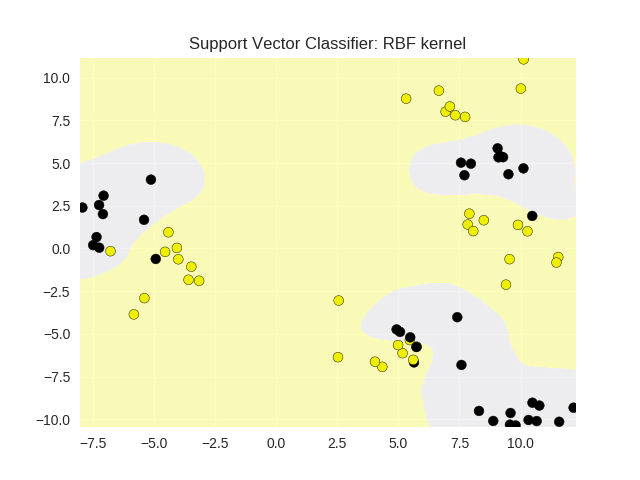

<IPython.core.display.Javascript object>


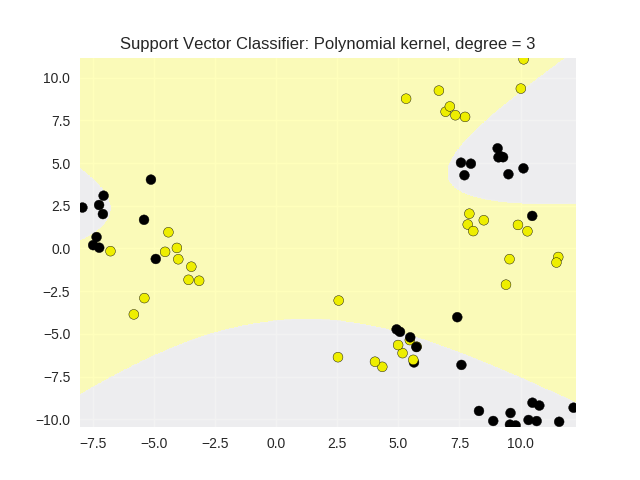

In [10]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)

# The default SVC kernel is radial basis function (RBF)
plot_class_regions_for_classifier(SVC().fit(X_train, y_train),
                                 X_train, y_train, None, None,
                                 'Support Vector Classifier: RBF kernel')

# Compare decision boundries with polynomial kernel, degree = 3
plot_class_regions_for_classifier(SVC(kernel = 'poly', degree = 3)
                                 .fit(X_train, y_train), X_train,
                                 y_train, None, None,
                                 'Support Vector Classifier: Polynomial kernel, degree = 3')

## RBF $\gamma$ parameter

Gamma controls how far the influence of a single trending example reaches, which in turn affects how tightly the decision boundaries end up surrounding points in the input space. 

* **Small gamma** means $\to$ larger similarity radius $\to$ points farther apart are considered similar $\to$ more points being group together $\to$ smoother decision boundaries $\to$ **underfitting**
* **Larger gamma** $\to$ the kernel value decays more quickly $\to$ points have to be very close to be considered similar $\to$ more complex, tightly constrained decision boundaries $\to$ **overfitting** 


#### Effect of $\gamma$ on decision boundaries

<IPython.core.display.Javascript object>


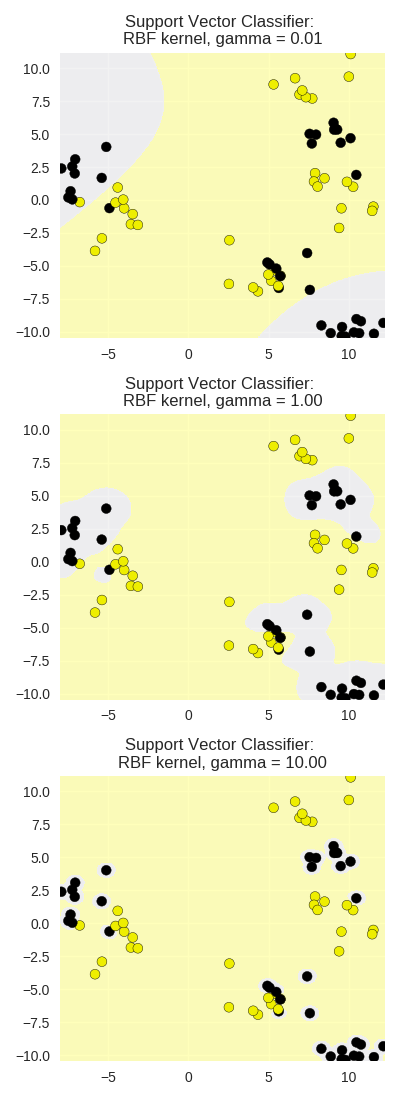

In [12]:
from adspy_shared_utilities import plot_class_regions_for_classifier
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(3, 1, figsize=(4, 11))

for this_gamma, subplot in zip([0.01, 1.0, 10.0], subaxes):
    clf = SVC(kernel = 'rbf', gamma=this_gamma).fit(X_train, y_train)
    title = 'Support Vector Classifier: \nRBF kernel, gamma = {:.2f}'.format(this_gamma)
    plot_class_regions_for_classifier_subplot(clf, X_train, y_train,
                                             None, None, title, subplot)
    plt.tight_layout()

## $\gamma$ & $C$ Interplay

* $\gamma$ large $\to$ $C$ will have little / no effect. 
* $\gamma$ small $\to$ the model is much more constrained $\to$ effectiveneses of $C$ similar to it's effect on a linear classifier

Typically, $\gamma$ and $C$ are tuned together, with the optimal combination typically in an intermediate range of values. For example, 
* $\gamma \to (0.0001 , 10)$ 
* $C \to (0.1, 100)$ 

Though the specifical optimal values will depend on your application. 

<IPython.core.display.Javascript object>


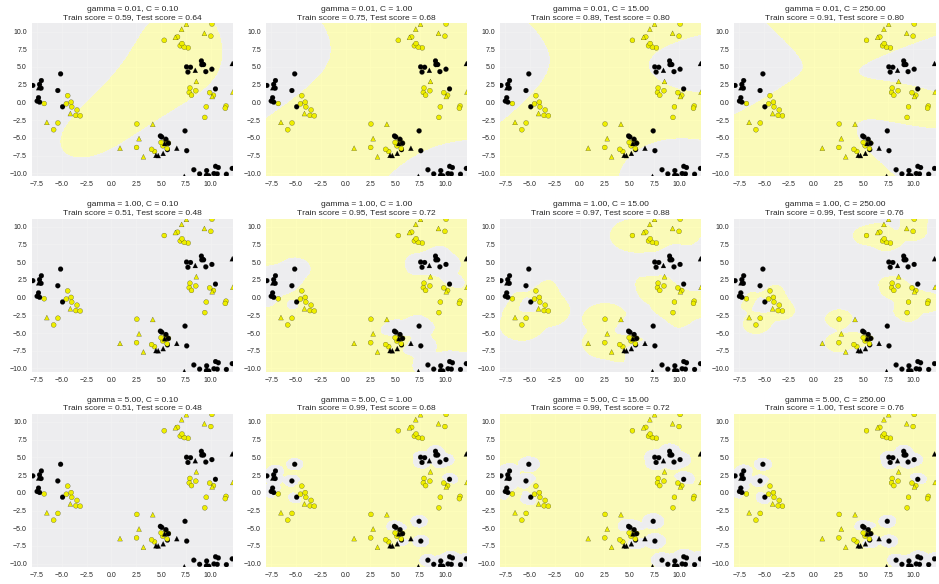

In [13]:
from sklearn.svm import SVC
from adspy_shared_utilities import plot_class_regions_for_classifier_subplot
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_D2, y_D2, random_state = 0)
fig, subaxes = plt.subplots(3, 4, figsize=(15, 10), dpi=50)

for this_gamma, this_axis in zip([0.01, 1, 5], subaxes):
    
    for this_C, subplot in zip([0.1, 1, 15, 250], this_axis):
        title = 'gamma = {:.2f}, C = {:.2f}'.format(this_gamma, this_C)
        clf = SVC(kernel = 'rbf', gamma = this_gamma, C = this_C).fit(X_train, y_train)
        plot_class_regions_for_classifier_subplot(clf, X_train, y_train, X_test, y_test, title, subplot)
        plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)

## Importance of Normalization
##### Application of SVMs to a real dataset: unnormalized data

In [16]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
# Breast cancer dataset for classification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

X_train, X_test, y_train, y_test = train_test_split(X_cancer, y_cancer, random_state = 0)

clf = SVC(C=10).fit(X_train, y_train)
print('Breast cancer dataset (unnormalized features)')
print('Accuracy of RBF-kernel SVC on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of RBF-kernel SVC on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Breast cancer dataset (unnormalized features)
Accuracy of RBF-kernel SVC on training set: 1.00
Accuracy of RBF-kernel SVC on test set: 0.63


The SVM is overfitting, results show well on training data but performing poorly on test data

##### Application of SVMs to a real dataset: normalized data with feature preprocessing using minmax scaling

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

clf = SVC(C=10).fit(X_train_scaled, y_train)
print('Breast cancer dataset (normalized with MinMax scaling)')
print('RBF-kernel SVC (with MinMax scaling) training set accuracy: {:.2f}'
     .format(clf.score(X_train_scaled, y_train)))
print('RBF-kernel SVC (with MinMax scaling) test set accuracy: {:.2f}'
     .format(clf.score(X_test_scaled, y_test)))

Breast cancer dataset (normalized with MinMax scaling)
RBF-kernel SVC (with MinMax scaling) training set accuracy: 0.98
RBF-kernel SVC (with MinMax scaling) test set accuracy: 0.96


## Pros of SVM

1. **Works well with range of datasets** - SVMs perform well on a range of datasets, and have been successfully applied on data that ranges from text to images and many more types.
2. **Potentially Versatile** - due to its ability to specify different kernel functions, including possible custom kernel functions depending on the data. 
3. **Work well for both low and high-dimensional data** - Including data with hundreds, thousands or even millions of sparse dimensions. This makes it **well suited to test classification** for example. 

## Cons of SVM

1. **Scalability takes a hit** - As training set size increases, the run time, speed, and memory usage in the SVM training phase also increases. So for a large datasets with hundreds of thousands, or millions of instances, an SVM may become less practical. 
2. SVM requires careful normalization of the input data as well as parameter tuning. The input should be normalized that all features have comparable units and around similar scales if they aren't already.  
3. **Don't provide direct probability estimates for predictions** which are needed for some applications. However, there are ways to estimate these probabilities using techniques such as plot scaling, which transforms the output of the classifier to a probability distribution over classes by fitting a logistic regression model to the classifiers scores. 
4. It could be **Difficult to interpret** the internal model parameters of a support vector machine. Which means the applicability of support vector machines in scenarios where interpretation is important for people may be limited when we want to understand why a particular prediction was made. 

## Model Complexity of SVM is a function of 3 parameters
* **kernel type** : deafult $\to$ **RBF**. Polynomial is another option. 
* $\gamma$ : each kernel has one or more kernel specific parameters that control aspects like the influence of training points according to their distance. In the case of the RBF kernel, SVM performance is very sensitive to the setting of the gamma parameter that controls the kernel width. 
* $C$: regularization parameter which typically tuned with the kernel parameters such as gamma for optimal performance. 